### Здесь аппарат факторизации применяется к вычислению барьерному опциону put с барьером снизу в модели Б-Ш "в лоб"

In [1]:
from math import log, sqrt
from numpy import exp, linspace, fft, array, arange, pi
import matplotlib.pyplot as plt
i = complex(0, 1)

In [2]:
# model parameters
T = 1
H_original = 90.0 # limit
K_original = 100.0 # strike
r_premia = 10 # annual interest rate
r = log(r_premia/100 + 1)
V0 = 0.316227766
sigma = V0
gamma = r - 0.5 * sigma**2 # Black-Scholes parameter

-32.109246619368065
31.203043023078568


C:\Users\angle\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


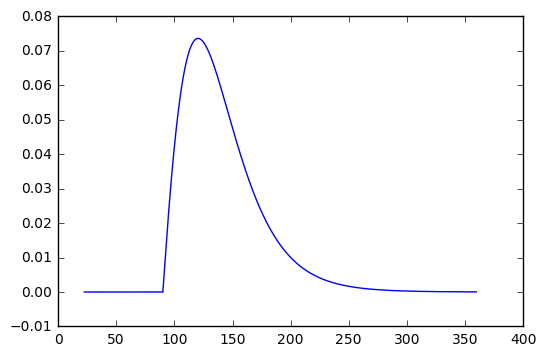

In [3]:
# constants in log scale for price, by Zanette
M = 2**12  # number of points in price grid
L = 2  # scaling coefficient
x_min = L * log(0.5)
x_max = L * log(2.0)
d = (x_max - x_min) / M  # discretization step
K = log(K_original/H_original)
H = log(H_original/H_original)
x_space = []  # prices array
for p_elem_index in range(M):
    x_space.append(x_min + p_elem_index * d)

original_prices_array = H_original * exp(x_space)
# time discretization
N = 50  # number_of_time_steps
delta_t = T/N
q = 1.0/delta_t + r
factor = (q*delta_t)**(-1)
# beta_plus and beta_minus
beta_minus = - (gamma + sqrt(gamma**2 + 2*sigma**2 * q))/sigma**2
beta_plus = - (gamma - sqrt(gamma**2 + 2*sigma**2 * q))/sigma**2
print(beta_minus)
print(beta_plus)

def G(x):
    """payoff_function for a given option type (down-and-out put there)"""
    if (H <= x) and (x <= K):
        return K_original - H_original*exp(x)
    else:
        return 0

f_0 = array([G(x_element) for x_element in x_space]) # = g(x) i.e. payoff func

xi_space = fft.fftfreq(M, d=d)

# factor functions
phi_plus_array = array([beta_plus/(beta_plus - i*2*pi*xi) for xi in xi_space])
phi_minus_array = array([-beta_minus/(-beta_minus + i*2*pi*xi) for xi in xi_space])

def indicator(a):
    """the indicator influences the function argument, not value.
    So here it iterates through x-domain and cuts any
    values of function with an argument less than H"""
    indicated = []
    for index in range(len(x_space)):
        if x_space[index] > H:
            indicated.append(a[index])
        else:
            indicated.append(0)
    return indicated

# main cycle (iterating over time)
f_n = array(f_0)
#plt.plot(original_prices_array, f_n)
for i in range(N):
   f_n_plus_1 = factor * fft.ifft(phi_minus_array *
       fft.fft(indicator(fft.ifft(phi_plus_array * fft.fft(f_n)))))
   f_n = f_n_plus_1
plt.plot(original_prices_array, f_n_plus_1)

plt.savefig("out.png")
plt.show()